# Week 1: Determine product pricing

## Scenario

Turtle Games sources and sells Lego products across various countries. They want your help with determining the optimal price of products that would achieve maximum sales results.

## Objective

Determine the optimal price at which they should sell Lego products based on the number of Lego pieces in the Lego set and the age of the customer that the product is most likely to be purchased by.

- What price should be set for the Lego sets with 8000 Lego pieces? 
- What price should be set for the Lego sets with 8000 Lego pieces that are most likely to be purchased by 30-year-old customers?

## Prepare workstation and import file

In [1]:
# Import libraries and packages for linear regression
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

Rationale for libaries and packages:
- Numpy: used for statistical calculations
- Pandas: used for data manipulation and analysis
- Statmodels: used to get OLS to fit a regression line and to calculate variance inflation factor
- Sklearn: used to calculate simple and multiple linear regression
- Matplotlib: used for plotting functions
- Seaborn: used for plotting functions

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

Rationale: Warnings usually occur when there are obsolete programming elements. Warnings have been turned off to make the code cleaner. However, this will still allow errors to appear.

In [3]:
# Import file
df_lego = pd.read_csv('lego.csv')

## Explore data through tables

In [4]:
# Check file for data types and missing values
df_lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


**Observations:** There are 12261 observations in the data frame. All data is numeric (as indicated by Dtype). There are no missing values (as indicated by the Non-Null Count against the total entry count).

In [5]:
# View first few rows of data
print(df_lego.head())

   ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   
2    19       12.99           11           74               4.3   
3     5       99.99           23         1032               3.6   
4     5       79.99           14          744               3.2   

   review_difficulty  country  
0                  0       20  
1                  2       20  
2                  2       20  
3                  0       20  
4                  1       20  


In [6]:
# View last few rows of data
print(df_lego.tail())

       ages  list_price  num_reviews  piece_count  play_star_rating  \
12256    23     36.5878            6          341               4.4   
12257    23     24.3878            8          217               4.1   
12258    23     24.3878           18          233               4.6   
12259    20     12.1878            1           48               5.0   
12260    20     12.1878           11          109               4.5   

       review_difficulty  country  
12256                  2       19  
12257                  2       19  
12258                  2       19  
12259                  4       19  
12260                  2       19  


**Observations:** The data appears to have loaded correctly. The values in each of the columns correspond with what is expected from the metadata.

In [7]:
# View distributon of data
print(df_lego.describe())

              ages    list_price   num_reviews   piece_count  \
count  12261.00000  12261.000000  12261.000000  12261.000000   
mean      16.68828     65.141998     14.603050    493.405921   
std        8.21868     91.980429     34.356847    825.364580   
min        0.00000      2.272400      0.000000      1.000000   
25%       11.00000     19.990000      1.000000     97.000000   
50%       19.00000     36.587800      4.000000    216.000000   
75%       23.00000     70.192200     11.000000    544.000000   
max       30.00000   1104.870000    367.000000   7541.000000   

       play_star_rating  review_difficulty       country  
count      12261.000000       12261.000000  12261.000000  
mean           3.709689           1.988826     10.015333  
std            1.641130           1.787565      6.185450  
min            0.000000           0.000000      0.000000  
25%            3.600000           0.000000      4.000000  
50%            4.400000           2.000000     10.000000  
75%       

**Observations:**
- Age (ages): ranges from 0-30 (mean: 17, median: 19)
- Price of the product (list_price): ranges from 2.27 USD-1104.87 USD (mean: 65.14 USD, median:36.59 USD)
- Number of reviews (num_reviews): ranges from 0-367 (mean: 15, median: 4)
- Number of Lego pieces in the product (piece_count): ranges from 1-7541 (mean: 493, median: 216)
- Star rating by players/customers (play_star_rating): ranges from 0-5 (mean: 4, median: 4)
- Difficulty level of the product (review_difficulty): ranges from 0-5 (mean: 2, median: 2)
- Number of countries product is sold to (country): ranges from 0-20 (mean: 10, median: 10)

## Explore data through visualisations

### Examine distribution of prices

Text(0.5, 1.0, 'Distribution of Prices')

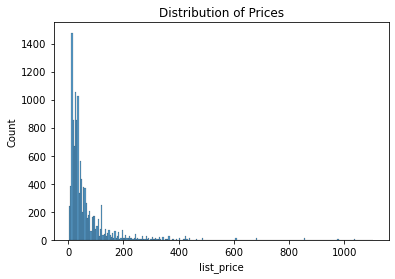

In [8]:
# View distribution of prices
sns.histplot(data=df_lego, x="list_price")
plt.title("Distribution of Prices")

Text(0.5, 1.0, 'Price Outliers')

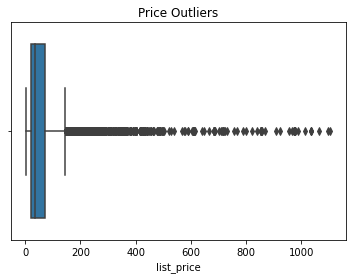

In [9]:
# View outliers
sns.boxplot(data=df_lego, x="list_price")
plt.title("Price Outliers")

**Observations:** Most products are priced between 19.99 USD and 70.19 USD with a median of 36.59 USD. There are many outliers at the high end of the price range. Prices range from as low as 2.27 USD and as high as 1104.87 USD. 

### Examine relationship between list price and piece count

In [10]:
# Define the dependent variable
y = df_lego['list_price'].values.reshape(-1,1)

In [11]:
# Define the independent variable
x = df_lego['piece_count'].values.reshape(-1,1)

In [12]:
# Run the regression
lm = LinearRegression()

In [13]:
# Fit the model
lm.fit(x,y)

LinearRegression()

In [14]:
# Print the target values
lm.predict(y)

array([[20.2307598 ],
       [19.26162524],
       [18.58323104],
       ...,
       [19.68783124],
       [18.50548707],
       [18.50548707]])

In [15]:
# Call the intercept
lm.intercept_

array([17.32432525])

In [16]:
# Estimated coefficients
lm.coef_

array([[0.09691346]])

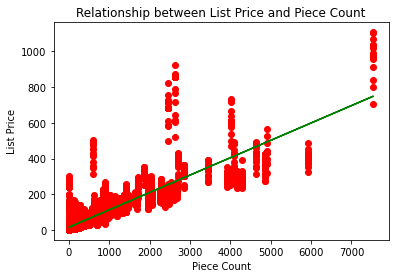

In [17]:
# Create scatterplot
plt.scatter(x, y, color="red")

# Create regression line
plt.plot(x, lm.predict(x), color="green")

# Set title
plt.title ("Relationship between List Price and Piece Count")

# Set label for x-axis
plt.xlabel("Piece Count")

# Set label for y-axis
plt.ylabel("List Price")

# Print graph
plt.show()

**Observations:** In general, as the piece count goes up, so does the list price. However, there may be other factors influencing the price as the relationship does not seem to be perfectly linear.

## Split the data into test and train data sets

**Rationale:** The purpose of a training data set is to train the model and estimate parameter values in a regression context. The test data set consists of data that was not involved with the estimation of the model. You can test the predictive performance of the model from the training test data set on the training data set and the test data set. This is helpful to guard against overfitting. Overfitting is when a statistical model fits so closely with its training data that the algorithm cannot make accurate predictions on unseen data. The algorithm therefore cannot generalise to new data and, as a result, is unable to perform classification or prediction tasks. 

Broadly, we want the training data set to be as large as possible while retaining enough observations to have a reasonable sized test data set. We will, therefore, set the training data set to 70% and the test data set to 30%.

In [18]:
# Split the data into test and train data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [19]:
# Linear regression; fitting the model
lm.fit(x_train, y_train)

LinearRegression()

## Simple linear regression 

**Rationale:** Simple linear regression is used to model the relationship between two continuous variables. The objective is usually to predict the value of an output or response variable (in our case, list price) based on the balue of an input or predictor variable (in our case, piece count). This will be used to help us determine the price that should be set for Lego sets with 8000 Lego pieces. 

### Train data set

In [20]:
# Predict the training set values
y_pred = lm.predict(x_train)

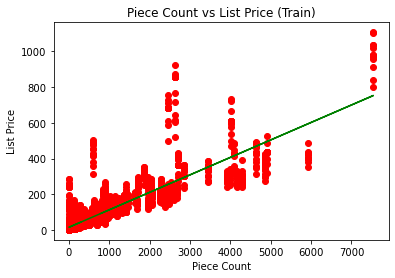

In [21]:
# Visualise the train data
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, y_pred, color="green")
plt.title("Piece Count vs List Price (Train)")
plt.xlabel("Piece Count")
plt.ylabel("List Price")

# Print the graph
plt.show()

**Observations:** The plot for the training data set is very similar to the plot from earlier using the entire data set. In general, as the piece count goes up, so does the list price. The relationship is not perfectly linear, so there could be other factors influencing list price.

In [22]:
# Print the R-squared of the training data
print(lm.score(x_train, y_train))

0.7644351150518354


**Observations:** The R-squared value determines the proportion of variance in the dependent variable that can be explained by the independent variable. In our case, the R-squared value tells us that 76% of the variation in list price can be explained by piece count.

In [23]:
# Print the intercept value
print("Intercept value: ", lm.intercept_)

Intercept value:  [17.02159751]


In [24]:
# Print the coefficient value
print("Coefficient value: ", lm.coef_)

Coefficient value:  [[0.09744347]]


**Observations:** The coefficient value signifies the amount y changes for a unit increase in x. In our case, the coefficient value tells us that each increase in piece count is associated with a 0.10 increase in the list price.

### Test data set

In [25]:
# Linear regression; fitting the model
lm.fit(x_test, y_test)

LinearRegression()

In [26]:
# Predict the test set values
y_pred = lm.predict(x_test)

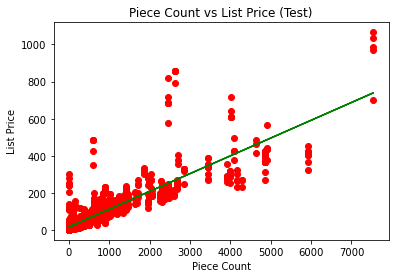

In [27]:
# Visualise the test data
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, y_pred, color="green")
plt.title("Piece Count vs List Price (Test)")
plt.xlabel("Piece Count")
plt.ylabel("List Price")

# Print the graph
plt.show()

**Observations:** The test data set plot varies slightly from the train data set plot but generally also shows that the list price tends to go up as the piece count goes up. 

In [28]:
# Print the R-squared value of the test data
print(lm.score(x_test, y_test))

0.736283806932537


**Observations:** 74% of the variation in list price can be explained by piece count.

In [29]:
# Print the intercept value
print("Intercept value: ", lm.intercept_)

Intercept value:  [18.04263613]


In [30]:
# Print the coefficient value
print("Coefficient value: ", lm.coef_)

Coefficient value:  [[0.09561197]]


**Observations:** Each increase in piece count is associated with a 0.10 increase in list price.

### Overall observations:

The values we obtained in the test data set are close to the values we obtained in the train data set. We can, therefore, conclude that our model for predicting list price based on piece count is a good model.

We can be more confident in our observations that 76% of the variation in list price can be explained by piece count and that each increase in piece count is associated with a 0.10 increase in list price.

## Multiple Linear Regression

**Rationale:** Multiple linear regression uses two or more independent variables to predict the outcome of a dependent variable. The technique enables analysts to determine the variation of the model and the relative contribution of each independent variable in the total variance. Multiple linear regression will help us to determine the price that should be set for the Lego sets with 8000 Lego pieces that are most likely to be purchased by 30-year-old customers.

**Methdology:** In the steps below we will define our dependent (list price) and independent variables (piece count and ages). Similar to simple linear regression, we split our data into test and train data sets to avoid overfitting, with 70% of the data assigned to the train data set and 30% assigned to the test data set.

We will check the R-squared, intercept, and coefficient values to see how closely these numbers match in the train and test data sets. If these values are similar, we can be more confident in using the R-squared value to explain how much of the variation in list price can be explained by piece count and age and in using the coefficient value to predict the change in list price based on the change in piece count and age.

### Set-up

In [31]:
# Define the dependent variable
y= df_lego['list_price']

In [32]:
# Define the independent variable
X = df_lego[['piece_count', 'ages']]

In [33]:
# Create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [34]:
# Multiple linear regression; fitting the model
multi = LinearRegression()
multi.fit(x_train, y_train)

LinearRegression()

### Train data set

In [35]:
# Predict the train set values
multi.predict(x_train)

array([ 94.33018165, 146.18236432,  17.2044989 , ...,  23.28063919,
        74.44140892,  45.95327683])

In [36]:
# Check the value of R-squared, intercept, and coefficients
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients: ")
list(zip(x_train, multi.coef_))

R-squared:  0.7644359915322901
Intercept:  16.84044731259106
Coefficients: 


[('piece_count', 0.09745348450200038), ('ages', 0.010571538500851458)]

**Observations:** In the train data set 76% of the variation in list price can be explained by piece count and age. Each increase in piece count is associated with a 0.10 increase in list price. Each increase in age is associated with a 0.01 increase in list price.

**OLS:** Ordinary Least Squares estimates the coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable. OLS minimises the prediction error between the predicted and real values. It takes into account the sum of squared errors instead of the errors as they are since these can sometime be negative or positive and could sum up to a nearly null value.

In [37]:
# Run regression on the train subset
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [38]:
# Training subset with MLR 
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.392e+04
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:49:05   Log-Likelihood:                -44845.
No. Observations:                8582   AIC:                         8.970e+04
Df Residuals:                    8579   BIC:                         8.972e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.8404      1.161     14.501      

**Observations:** In the train data set 76% of the variation in list price can be explained by piece count and age. Each increase in piece count is associated with a 0.10 increase in list price. Each increase in age is associated with a 0.01 increase in list price.

This matches what we found earlier.

In [39]:
# Predictions for train subset
y_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 94.33018165 146.18236432  17.2044989  ...  23.28063919  74.44140892
  45.95327683]


In [40]:
# Determine mean absolute error and mean square error
meanAbErr = metrics.mean_absolute_error(y_train, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_mlr)

In [41]:
# Print R-squared, Mean Absolute Error, and Mean Square Error values
print('R-squared: {:2f}'.format(mlr.score(X,y) *100))
print('Mean Absolute Error:', meanAbErr) 
print('Mean Square Error:', meanSqErr)

R-squared: 75.623765
Mean Absolute Error: 20.48437046417795
Mean Square Error: 2024.3055537470063


**Observations:** The R-squared value tells us that 76% of the variance in list price can be explained by piece count and age. 

The mean absolute error is the average of the absolute differences between the actual values and the predicted values. The closer MAE is to 0, the better. In our case, the MAE is 20.

The mean square error indicates how different the population mean is likely to be from the sample mean. It tells you how much the sample mean would vary if you were to repeat a study using new samples from within a single population. The mean square error is high, at 2024. However, this also reflects a different unit of measurement since value is USD^2. Therefore, the mean absolute error is a better indicator.

**Check multicollinearity:** Multicollinearity may occur if there are strong correlations between two or more independent variables in an MLR model. High multicollinearity suggests that independent variables are linearly related to each other. 

Multicollinearity can mask the true effects of our analysis, particularly if we are trying to see how well each independent variable can predict the dependent variable. Generally, multicollinearity causes unreliable coefficient estimates. Multicollinearity also lessens the statistical power of the model, making it harder to identify independent variables that are genuinely statistically significant.

In [42]:
# Check multicollinearity
x_temp = sm.add_constant(x_train)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif['features'] = x_temp.columns
print(vif.round(1))

   VIF Factor     features
0         5.7        const
1         1.0  piece_count
2         1.0         ages


**Observations:** The variance inflation factor (VIF) measures multicollinearity by identifying the correlation between independent variables and the strength of correlation. The VIF factor for both piece count and ages is 1. This means that there is no correlation between piece count and ages, which strengthens the accuracy of our MLR model.

**Check homoscedasticity:** Homoscedasticity is the assumption that the variation in the residuals (or amount of error in the model) is similar at each point across the model. This is important to check because uneven variances in samples result in biased and skewed test results.

In [43]:
# Run the Breusch-Pagan test function on the model residuals and x-variables:
model = sms.het_breuschpagan(model.resid, model.model.exog)

In [44]:
# Print the results of the Breusch-Pagan test:
terms =['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 738.140223598118, 'LM Test p-value': 5.186650810533334e-161, 'F-stat': 403.66000660156396, 'F-test p-value': 2.869153157610451e-168}


**Observations:** The p-value of the LM test is 5.187 which is greater than 0.05, the assigned significance level. Therefore, we fail to reject the null hypothesis and confirm that heteroscedasticity is not present in the model.

### Test data set

In [45]:
# Predict the test set values
multi.predict(x_test)

array([23.11744684, 30.23981311, 53.52062436, ..., 68.7656541 ,
       71.2994447 , 32.43300483])

In [46]:
# Print the value of the R-squared, intercept, and coefficients
print("R-squared: ", multi.score(x_test, y_test))
print("Intercept: ", multi.intercept_)
print("Coefficients: ")
list(zip(x_test, multi.coef_))

R-squared:  0.7360238984201946
Intercept:  16.84044731259106
Coefficients: 


[('piece_count', 0.09745348450200038), ('ages', 0.010571538500851458)]

**Observations:** In the test data set 74% of the variation in list price can be explained by piece count and age. Each increase in piece count is associated with a 0.10 increase in list price. Each increase in age is associated with a 0.01 increase in list price.

These values are very close to what we obtained in our train data set.

**Check model with OLS**

In [47]:
# Test subset with MLR
model = sm.OLS(y_test, sm.add_constant(x_test)).fit()
Y_pred = model.predict(sm.add_constant(x_test))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     5133.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:49:06   Log-Likelihood:                -19333.
No. Observations:                3679   AIC:                         3.867e+04
Df Residuals:                    3676   BIC:                         3.869e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.6652      1.844      9.037      

**Observations:** In the test data set 74% of the variation in list price can be explained by piece count and age. Each increase in piece count is associated with a 0.10 increase in list price. Each increase in age is associated with a 0.08 increase in list price.

These values are similar to what we found earlier, with a slight difference for the ages coefficient.

In [48]:
# Create predictions for test set
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [23.11744684 30.23981311 53.52062436 ... 68.7656541  71.2994447
 32.43300483]


In [49]:
# Determine mean absolute error and mean square error
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)

In [50]:
# Print R-squared, Mean Absolute Error, and Mean Square Error values
print('R squared: {:2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 75.623765
Mean Absolute Error: 20.655927137322237
Mean Square Error: 2150.458473111799


**Observations:** The R-squared value tells us that 76% of the variance in list price can be explained by piece count and age. 

The mean absolute error is the average of the absolute differences between the actual values and the predicted values. The closer MAE is to 0, the better. In our case, the MAE is 21.

The mean square error indicates how different the population mean is likely to be from the sample mean. It tells you how much the sample mean would vary if you were to repeat a study using new samples from within a single population. The mean square error is high, at 2150. However, this also reflects a different unit of measurement since value is USD^2. Therefore, the mean absolute error is a better indicator.

These values are very close to the train data set (R-squared=76, Mean Abs Error=20, Mean St Error=2024).

In [51]:
# Check multicollinearity of test data set
x_temp = sm.add_constant(x_test)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif['features'] = x_temp.columns
print(vif.round(1))

   VIF Factor     features
0         5.8        const
1         1.0  piece_count
2         1.0         ages


**Observations:** The variance inflation factor (VIF) measures multicollinearity by identifying the correlation between independent variables and the strength of correlation. The VIF factor for both piece count and ages is 1. This means that there is no correlation between piece count and ages, which strengthens the accuracy of our MLR model.

These values are the same as the train data set.

In [52]:
# Run the Breusch-Pagan test function on the model residuals and x-variables:
model = sms.het_breuschpagan(model.resid, model.model.exog)

In [53]:
# Print the results of the Breusch-Pagan test:
terms =['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 291.37294089292186, 'LM Test p-value': 5.360061801559846e-64, 'F-stat': 158.0880823116198, 'F-test p-value': 1.3700936461978565e-66}


**Observations:** The p-value of the LM test is 5.360 which is greater than 0.05, the assigned significance level. Therefore, we fail to reject the null hypothesis and confirm that heteroscedasticity is not present in the model.

This value is similar to what we saw in the train data set (5.187).

### Overall observations:

The values we obtained in the test data set are close to the values we obtained in the train data set. In addition, there is no correlation between piece count and age and we can confirm that heteroscedasticity is not present in the model. We can, therefore, conclude that our model for predicting list price based on piece count and age is a good model.

We can be more confident in our observations that 76% of the variation in list price can be explained by piece count and age. Each increase in piece count is associated with a 0.10 increase in list price. Each increase in age is associated with a 0.01 increase in list price.

## Determine optimal prices

### What price should be set for the Lego sets that have 8000 pieces?

In [54]:
# Print predicted value based on lm model
print(f'Predicted value 8000 pieces: \n {lm.predict([[8000]])}')

Predicted value 8000 pieces: 
 [[782.93836492]]


### What price should be set for all the Lego sets that have 8000 pieces and are most likely to be purchased by customers who are 30 years old?

In [55]:
# Print predicted value based on mlr model
Pieces = 8000
Age = 30
print('Predicted Value 8000 pieces, age 30: \n', mlr.predict([[Pieces, Age]]))

Predicted Value 8000 pieces, age 30: 
 [796.78546948]


## Insights

There is a fairly linear relationship between piece count and list price. As piece count goes up, the list price also tends to go up. List price also tends to be higher as age increases, although the effect isn't as high as piece count. 76% of the variation in list price can be explained by piece count and 76% of the variation in list price can be explained by both piece count and age.

We can be fairly confident in our linear and multilinear models that we created to predict list price based on piece count and piece count + age due to the similarity in the train vs test data sets along with the lack of multicollinearity and heteroscedasticity. 

TurtleGames should charge 782.94 USD for Lego sets with 8000 pieces. They should charge 796.79 USD for Lego sets that have 8000 pieces and are most likely to be purchased by customers who are 30 years old.